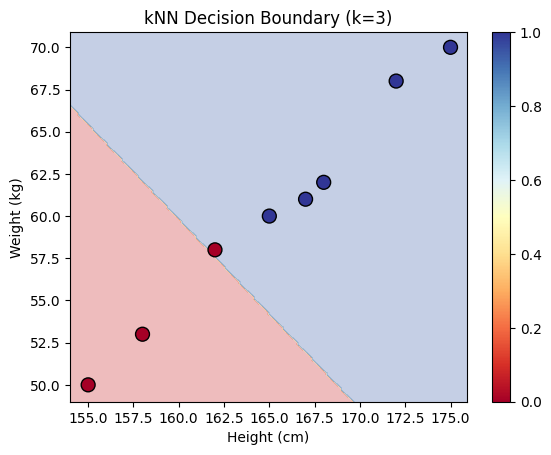

Test set predictions: [0 1]
Actual labels: [0 1]
Accuracy: 100.00%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

data = [
    [165, 60, 1],
    [170, 65, 1],
    [160, 55, 0],
    [175, 70, 1],
    [155, 50, 0],
    [168, 62, 1],
    [162, 58, 0],
    [172, 68, 1],
    [158, 53, 0],
    [167, 61, 1]
]

X = np.array([row[:2] for row in data])  # height, weight
y = np.array([row[2] for row in data])  # class (Pass=1, Fail=0)

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn(X_train, y_train, X_test, k):
    predictions = []

    for test_point in X_test:
        distances = []

        for train_point, label in zip(X_train, y_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, label))

        distances.sort(key=lambda x: x[0])
        nearest_neighbors = distances[:k]

        votes = [neighbor[1] for neighbor in nearest_neighbors]
        majority_vote = Counter(votes).most_common(1)[0][0]
        predictions.append(majority_vote)

    return np.array(predictions)

def train_test_split(X, y, test_size=0.2):
    data_size = len(X)
    test_size = int(data_size * test_size)

    indices = np.random.permutation(data_size)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    X_train = X_shuffled[:-test_size]
    y_train = y_shuffled[:-test_size]
    X_test = X_shuffled[-test_size:]
    y_test = y_shuffled[-test_size:]

    return X_train, y_train, X_test, y_test

def calculate_accuracy(predictions, true_labels):
    return np.sum(predictions == true_labels) / len(true_labels)

def plot_decision_boundaries(X_train, y_train, k=3):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predicted_classes = knn(X_train, y_train, grid_points, k)

    Z = predicted_classes.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k', s=100)
    plt.title(f'kNN Decision Boundary (k={k})')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.colorbar()
    plt.show()

k = 3
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

plot_decision_boundaries(X_train, y_train, k)

predictions = knn(X_train, y_train, X_test, k)

accuracy = calculate_accuracy(predictions, y_test)

print(f"Test set predictions: {predictions}")
print(f"Actual labels: {y_test}")
print(f"Accuracy: {accuracy * 100:.2f}%")
